<a href="https://colab.research.google.com/github/AnujM09/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [63]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

In [64]:
# Importing all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [65]:
# Importing File from drive
df=pd.read_csv('/content/drive/MyDrive/Capstone_Project_For_Data_Science/Bike_Sharing_Demand_Prediction/CSV/SeoulBikeData.csv',encoding='latin')

In [66]:
# Checking top 5 Rows of data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [67]:
# Shape of dataframe
df.shape

(8760, 14)

In [68]:
# Null values if any
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**NOTE:** There is no null values present in the dataset.

In [69]:
# Duplicate values if any
df.duplicated().sum()

0

In [70]:
# short summary of dataframe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# **Data Preproccessing**

In [71]:
# Extracting Weekends
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day_name()

In [72]:
df['day'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [73]:
df['weekend']=df['day'].apply(lambda x: 1 if x=='Sunday' or x=='Saturday' else 0)

In [74]:
df['Month']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

# **Expoatory Data Analysis**

Exploratory data analysis is a statistical approach to data comprehension that is typically carried out visually. Exploratory data analysis graphs are plotted to help the analyst understand the data.

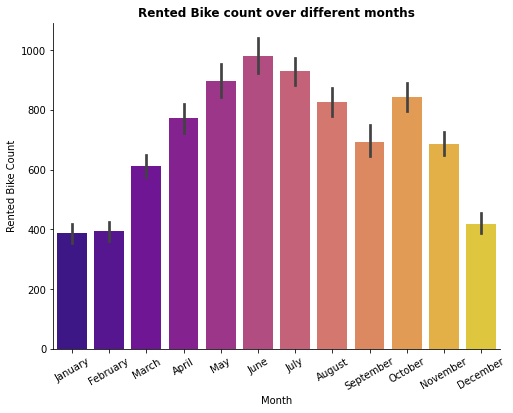

In [75]:
# Bike Count Over Months
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different months', fontweight = 'bold')
sns.barplot(data = df, x='Month', y = 'Rented Bike Count', palette ='plasma')
sns.despine()
plt.xticks(rotation='30')
plt.show()

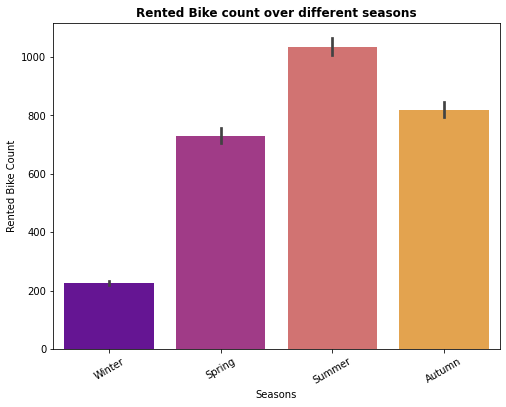

In [76]:
# Bike Count Over Seasons
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different seasons',fontweight = 'bold')
sns.barplot(data = df, x='Seasons', y = 'Rented Bike Count', palette ='plasma')
plt.xticks(rotation='30')
plt.show()

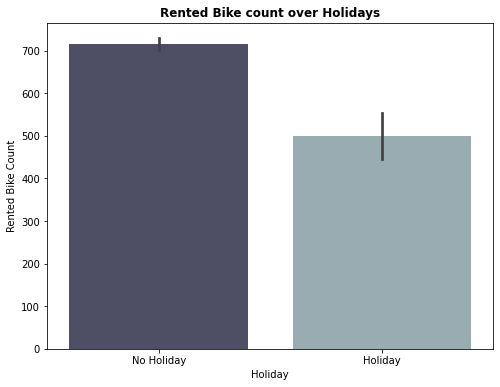

In [77]:
# Bike Count Over Holidays
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over Holidays',fontweight = 'bold')
sns.barplot(data = df, x='Holiday', y = 'Rented Bike Count', palette ='bone')
plt.show()

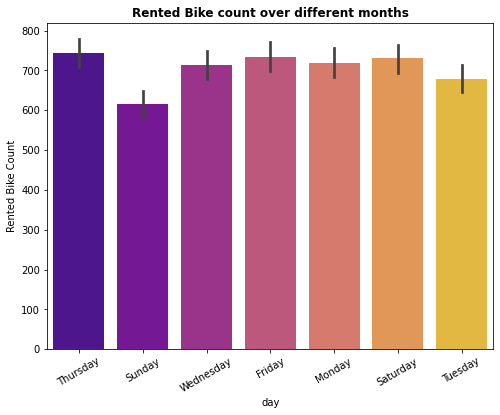

In [78]:
# Bike Count Over Months
plt.figure(figsize=(8,6))
plt.title('Rented Bike count over different months',fontweight = 'bold')
sns.barplot(data = df, x='day', y = 'Rented Bike Count', palette ='plasma')
plt.xticks(rotation='30')
plt.show()

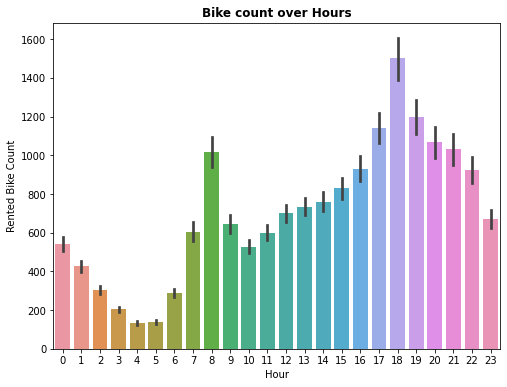

In [79]:
plt.figure(figsize=(8,6))
plt.title('Bike count over Hours',fontweight = 'bold')
sns.barplot(data=df, x='Hour', y = 'Rented Bike Count')
plt.show()

In [80]:
# Dropping Unwated columns & Saving it in the new dataframe
df1 = df.drop(['Date','day','Month','year'], axis=1)

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  weekend                    8760 non-null   int64

In [82]:
# Now check all numerical columns with the help of distplot
numeric_feature=df1.select_dtypes(include=['int64','float64']).columns
numeric_feature

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'weekend'],
      dtype='object')

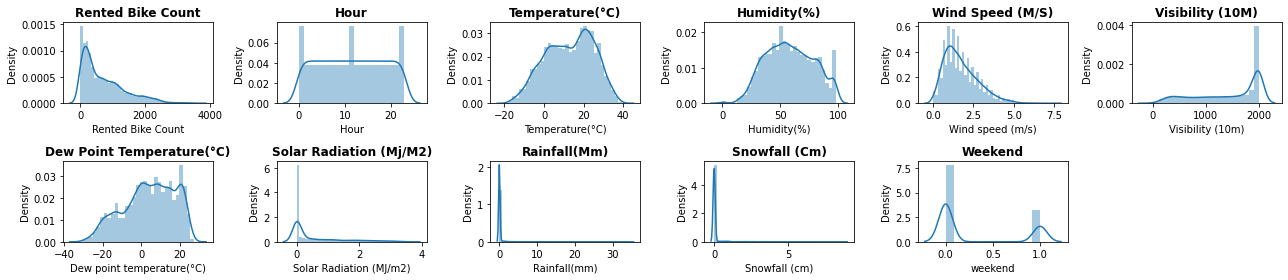

In [83]:
# Visualizing the distributions
plt.figure(figsize=(18,4))
for n,column in enumerate(df1.describe().columns):
  plt.subplot(2,6,n+1)
  sns.distplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

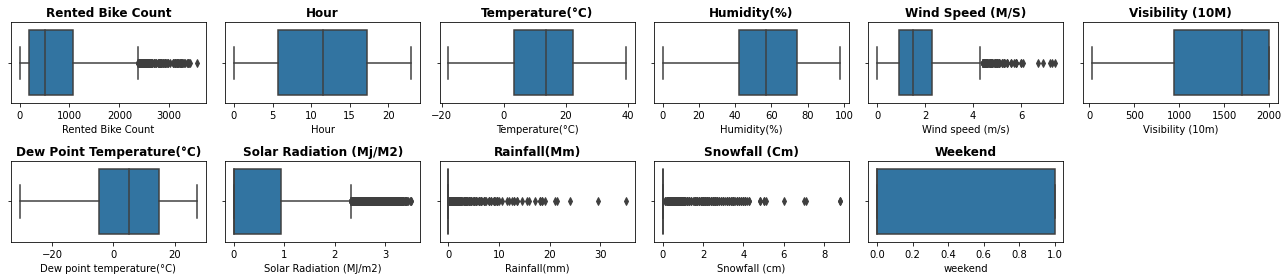

In [84]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df1.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

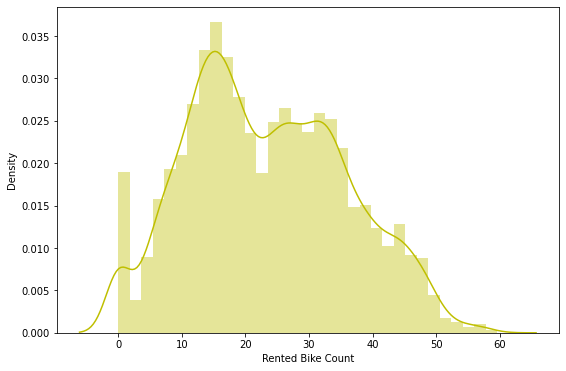

In [85]:
# from above two graphs we can see that there are so many outliers are present so we have to apply transformation
plt.figure(figsize=(9, 6))
sns.distplot(np.sqrt(df['Rented Bike Count']), color='y')
plt.show()

In [86]:
# Checking for the skewness in the Dependent Column
np.sqrt(df['Rented Bike Count']).skew()

0.237362090985412

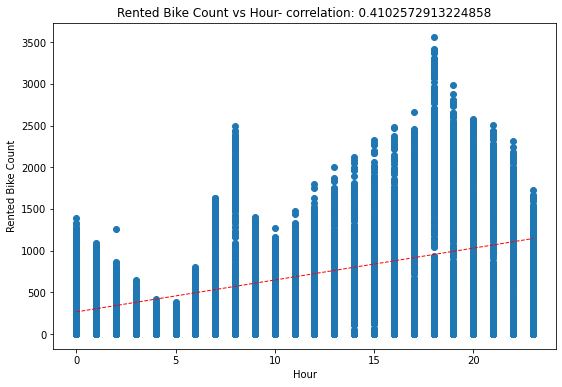

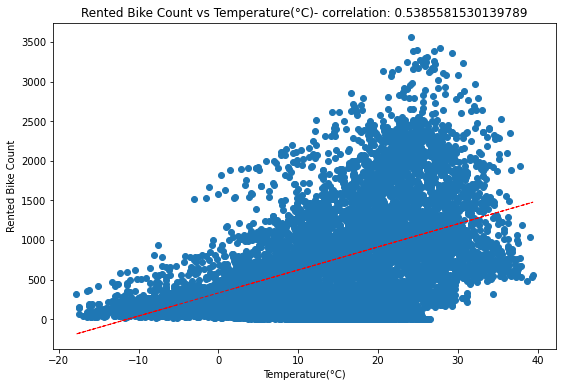

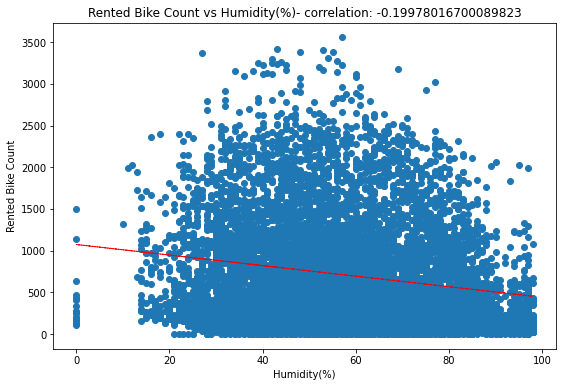

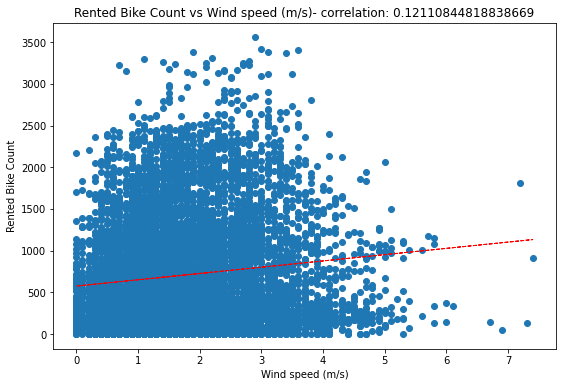

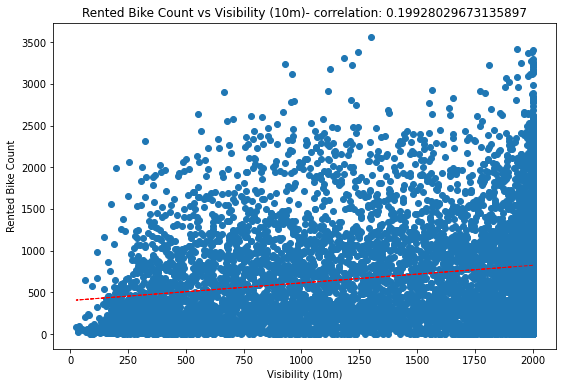

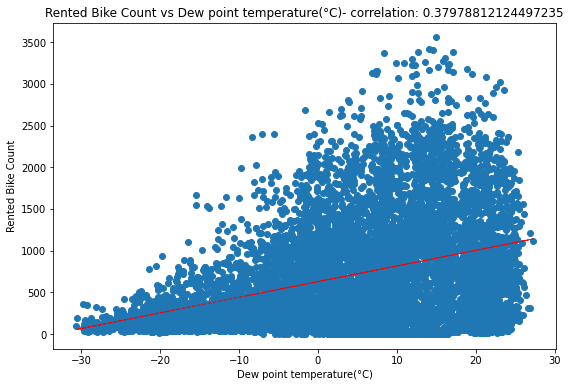

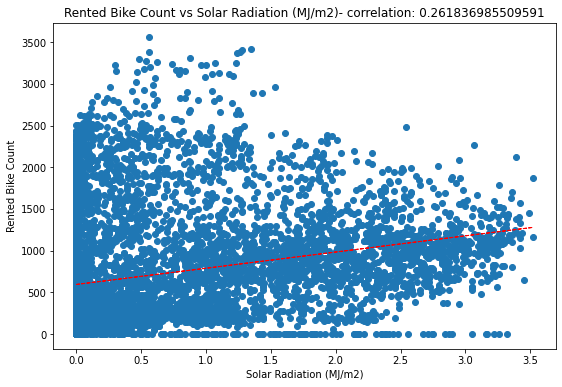

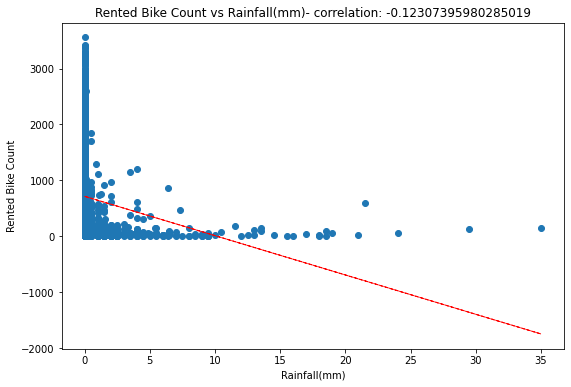

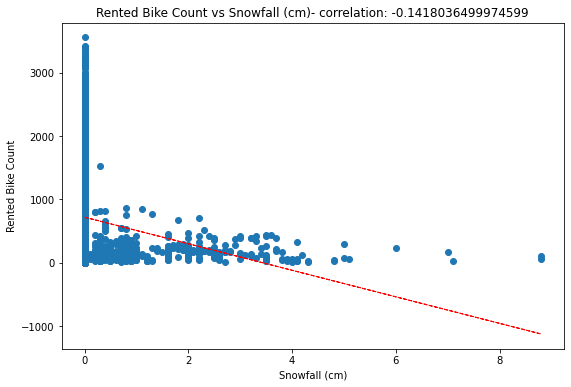

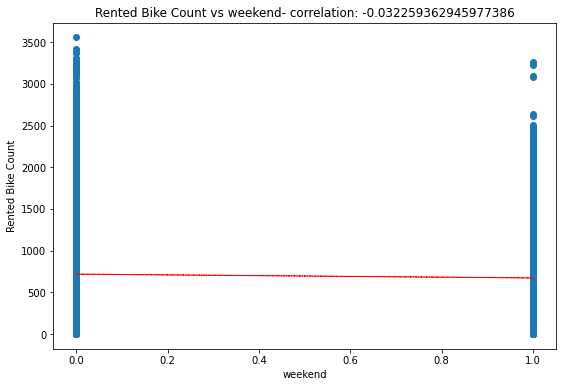

In [87]:
# Now we will check correlarion between output columns and individual columns
for col in numeric_feature[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [88]:
# Same thing we can see from here also
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
weekend                     -0.032259
year                         0.215162
Name: Rented Bike Count, dtype: float64

# **Correlation Heatmap**

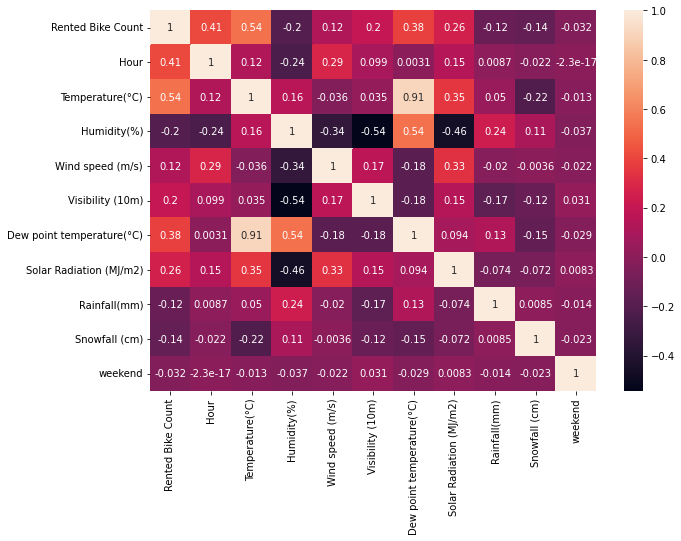

In [89]:
# Now check correlation between independent columns
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [90]:
# From above heatmap we can see that Temperature and Dew Point Temperature are highly correlated
# Here we have manually dropped the column 
df2 = df1.drop(['Temperature(°C)'],axis=1)

In [91]:
df2.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


## Removing Multi-colinearity

In [92]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,3.853073
1,Humidity(%),5.426643
2,Wind speed (m/s),4.732346
3,Visibility (10m),5.022818
4,Dew point temperature(°C),1.666289
5,Solar Radiation (MJ/m2),1.922305
6,Rainfall(mm),1.080083
7,Snowfall (cm),1.112414
8,weekend,1.404406


The VIF measures how strongly the independent variables are correlated. By regressing one variable against each other and the dependent variable, it is predicted. How well a variable is explained by other independent variables is indicated by its VIF score.

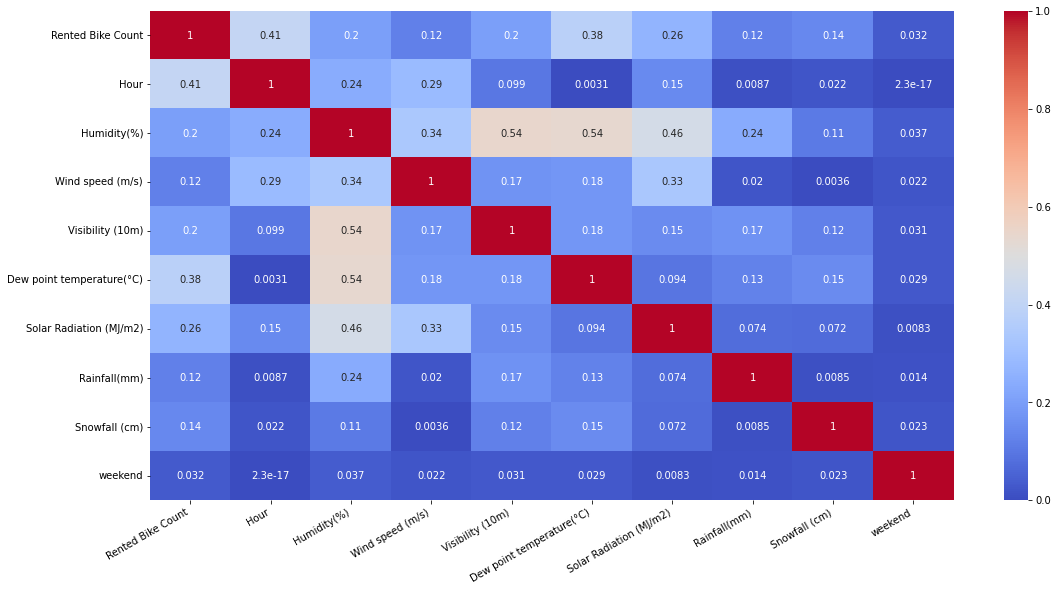

In [93]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df2.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [94]:
# Now for Categorical data
# OneHot Encoding

df3 = pd.get_dummies(df1, columns=['Seasons','Holiday','Functioning Day'], drop_first = True)

In [95]:
df3.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1,1


In [96]:
# Now extracting x and y values for train and test split

X = df3.iloc[:,1:].values

y = df3.iloc[:,0].values

In [97]:
X

array([[ 0. , -5.2, 37. , ...,  1. ,  1. ,  1. ],
       [ 1. , -5.5, 38. , ...,  1. ,  1. ,  1. ],
       [ 2. , -6. , 39. , ...,  1. ,  1. ,  1. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  1. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  1. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  1. ,  1. ]])

In [98]:
y

array([254, 204, 173, ..., 694, 712, 584])

In [99]:
# Now convert y into sqrt of y
y = np.sqrt(y)
y

array([15.93737745, 14.28285686, 13.15294644, ..., 26.34387974,
       26.68332813, 24.16609195])

# **Train Test Split Model**

Data division into Train and Test: The data will now be divided into TRAIN and TEST (80:20 ratio) For this, we'll utilise the train test split method from the sklearn package.

In [100]:
# Spliting dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [101]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)


In [102]:
# Standard Scaling
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# **Model Building**

A machine learning model is created by taking the knowledge it has gained from training data, generalising it, and then using it to make predictions and achieve its goal. You can't develop the model if there aren't enough data, and having access to data is insufficient.

# **Linear Regression Model**

The linear regression method models the connection between a scalar answer and one or more explanatory variables (also known as dependent and independent variables). Simple linear regression is used when there is only one explanatory variable; multiple linear regression is used when there are more than one.

In [103]:
# Fitting Linear Regression Model
lr = LinearRegression()

lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
y_pred_train  = lr.predict(x_train_scaled)

In [104]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error
mse  = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score on train & test Data
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted R2_test : ",Adj_R2)
print('*'*30)

MSE:  177685.60680096532
******************************
RMSE:  421.52770585213653
******************************
MAE:  276.90116214696326
******************************
R2_train:  0.5821193867984004
R2_test:  0.5754455991081026
******************************
Adjusted R2_test :  0.6448276349380475
******************************


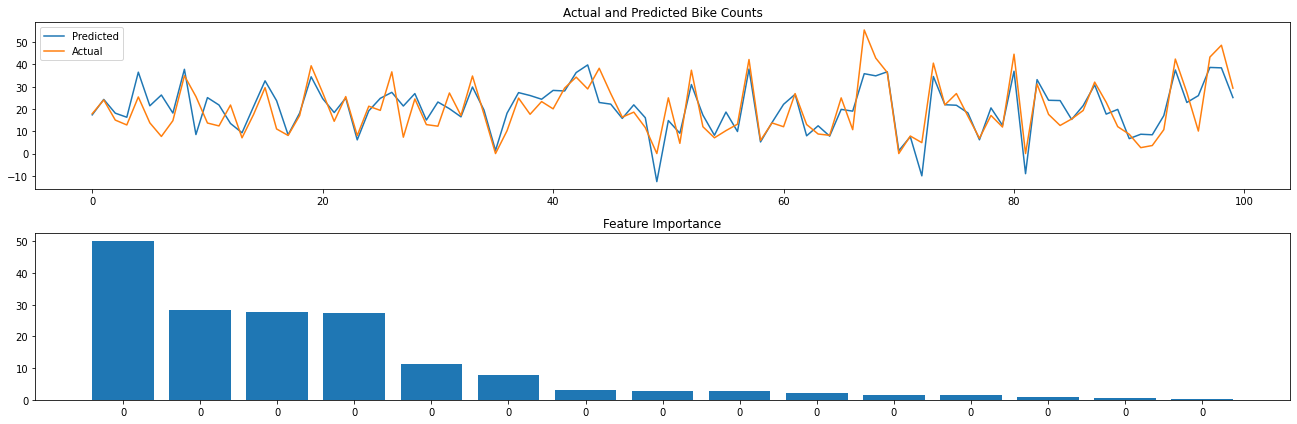

In [105]:
imp = np.abs(lr.coef_)

indices = np.argsort(imp)
indices = indices[::-1]

# Plotting actual and predicted values and the feature importance:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## **Note:** 

*   For better outcomes, we need to make our model more sophisticated or switch to a tree and ensembling technique.
*   The model underfitted after attempting feature combinations with linear regression. It was clear because data is dispersed so widely. It didn't seem practicable to fit a line.
*   Our train score came out to be 0.64 and test score came out to be 0.65.


# **Decision Tree Regressor**

A decision tree is a tree structure that is used to develop regression or classification models. It incrementally divides a dataset into smaller and smaller sections while also developing an associated decision tree. The end result is a tree containing leaf nodes and decision nodes.

In [106]:
#calling decision tree regressor
dtr = DecisionTreeRegressor(random_state=1)

# fit independent varaibles to the dependent variables
dtr.fit(x_train_scaled,y_train)

y_pred = dtr.predict(x_test_scaled)
y_pred_train  = dtr.predict(x_train_scaled)

In [107]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

# HYperparameter Grid
param_grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(dtr, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv=5)

dt.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [108]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error 
mse  = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted_R2 : ",Adj_R2)
print('*'*30)

MSE:  71897.33732876713
******************************
RMSE:  268.13678846582604
******************************
MAE:  156.62157534246575
******************************
R2_train:  1.0
R2_test:  0.8282115725359273
******************************
Adjusted_R2 :  0.8477529231991647
******************************


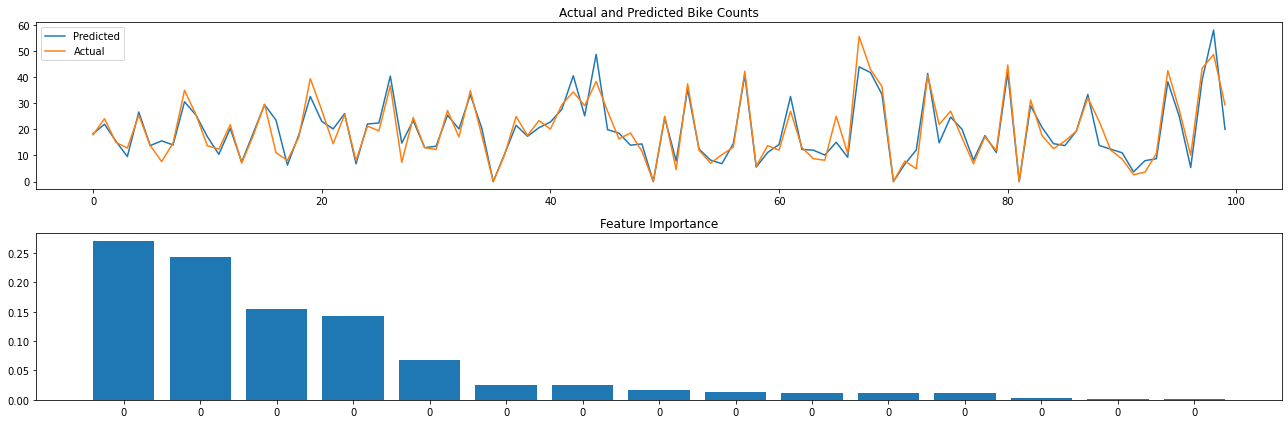

In [109]:
imp = np.abs(dtr.feature_importances_)

indices = np.argsort(imp)
indices = indices[::-1]

# Plotting actual and predicted values and the feature importance:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

**Note:**  


*   As expected Decision tree has overfitted the data.
*   We obtained a model r-squared value of 0.84 using the Decision tree. It 
overfitted with the default parameters, reaching an r-squared of 1 for the training dataset but 0.84 for the test.

# **Random Forest Regressor**

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [110]:
rfr = RandomForestRegressor()

rfr.fit(x_train_scaled,y_train)

param_grid = {'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [50,60,60],
    'min_samples_split': [50,100,150],
    'n_estimators': [200, 300, 1000]}

g_sr = GridSearchCV(estimator = rfr, param_grid = param_grid, scoring = 'neg_mean_squared_error',
                          cv = 5)

y_pred = rfr.predict(x_test_scaled)
y_pred_train  = rfr.predict(x_train_scaled)

In [111]:
g_sr.fit(x_train_scaled,y_train)
g_sr.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 200}

In [112]:
rf = RandomForestRegressor( bootstrap = True,
 max_depth = 90,
 max_features = 3,
 min_samples_leaf = 50,
 min_samples_split = 100,
 n_estimators = 300)

rf.fit(x_train_scaled,y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=50,
                      min_samples_split=100, n_estimators=300)

In [113]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error
mse  = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score on train & test Data
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted_R2: ",Adj_R2)
print('*'*30)

MSE:  44757.60828714736
******************************
RMSE:  211.5599401757038
******************************
MAE:  125.41385997592751
******************************
R2_train:  0.9855576058661026
R2_test:  0.8930580821158507
******************************
Adjusted_R2:  0.9118599132129015
******************************


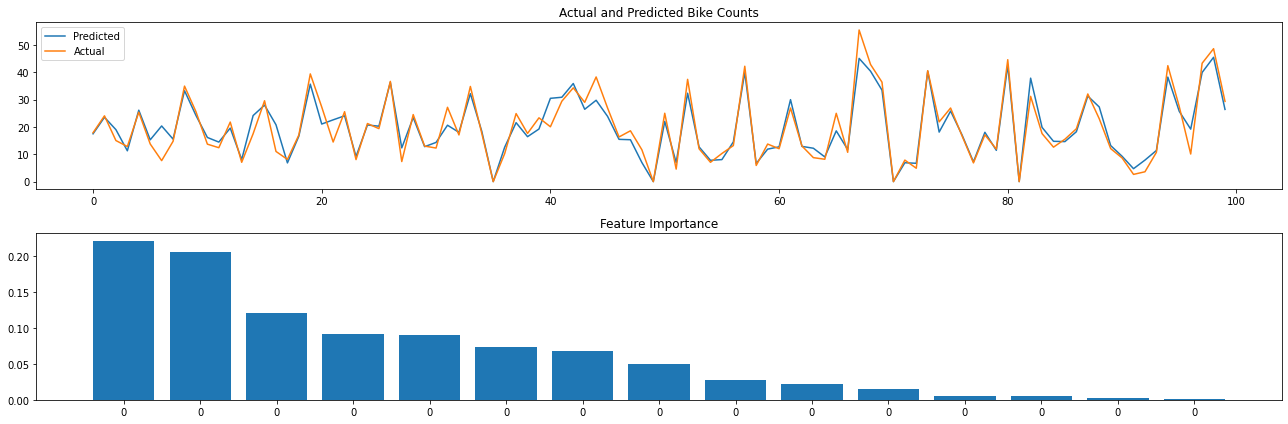

In [114]:
imp = np.abs(rf.feature_importances_)

indices = np.argsort(imp)
indices = indices[::-1]

# Plotting actual and predicted values and the feature importance:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# **XGBoost Regressor**

Extreme Gradient Boosting (XGBoost) is an open-source toolkit that provides an efficient and effective implementation of the gradient boosting method. XGBoost is an efficient gradient boosting solution that can be used for regression predictive modelling.

In [115]:
xgb = XGBRegressor(silent=True, random_state=3)

xgb.fit(x_train_scaled,y_train)

grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

xgb_cv = GridSearchCV(xgb, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)

xgb_cv.fit(x_train_scaled,y_train)

y_pred = xgb_cv.predict(x_test_scaled)
y_pred_train  = xgb_cv.predict(x_train_scaled)

In [116]:
# Caluculating Metrics of ML model

# Cheching the Mean Squared Error
mse = mean_squared_error(y_test**2, y_pred**2)
# Printing the Results of Mean Squared Error
print('MSE: ',mse)
print('*'*30)

# Cheching the Root Mean Squared Error
rmse = np.sqrt(mse)
# Printing the Results of Root Mean Squared Error
print('RMSE: ',rmse)
print('*'*30)

# Cheching the Root Mean Absolute Error
MAE = mean_absolute_error(y_test**2, y_pred**2)
# Printing the Results of Mean Absolute Error
print('MAE: ',MAE)
print('*'*30)

# Cheching the R2 Score on train & test Data
r2_train = r2_score(y_train**2,y_pred_train**2)
r2_test = r2_score(y_test**2, y_pred**2)
# Printing the Results of R2 Score
print('R2_train: ',r2_train)
print('R2_test: ',r2_test)
print('*'*30)

# Cheching the Adjusted R2 Score
Adj_R2 = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
# Printing the Results of Adjusted R2 Score
print("Adjusted R2: ",Adj_R2)
print('*'*30)

MSE:  40519.86893545633
******************************
RMSE:  201.2954766890114
******************************
MAE:  117.76850567302586
******************************
R2_train:  0.9805633607015837
R2_test:  0.9031835555516846
******************************
Adjusted R2:  0.9192617812944707
******************************


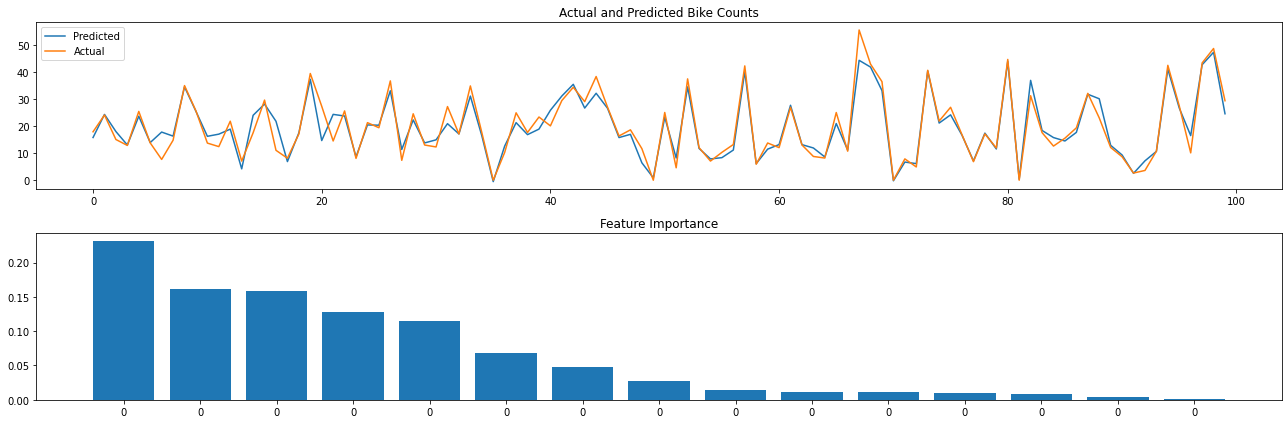

In [117]:
imp = np.abs(xgb.feature_importances_)

indices = np.argsort(imp)
indices = indices[::-1]

# Plotting actual and predicted values and the feature importance:
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.plot((y_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')
plt.subplot(2,1,2)
plt.bar(range(len(indices)),imp[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# **Conclusion**

*   As indicated in the problem description, the company was founded in 2017. As a result, the quantity of motorcycles rented in 2017 was insufficient.

*    We can observe that the number of rental bikes in 2018 was 5986984, which was more than in 2017.

*   We may say that the number of rental bikes is substantially larger on non-holiday days than on holidays.

*   We may say that the number of rental bikes is substantially larger on non-holiday days than on holidays.


*   The number of business hours each day and the demand for leased motorcycles were the most closely associated.

*   The most bikes were rented at the 18th hour of the day. 


*   After attempting various feature combinations with linear regression, the model was found to be underfit. Because data is dispersed so widely, it became evident. Fitting a line didn't seem realistic.
   

*   The most critical factors for forecasting the number of bikes needed were the hour, temperature, and solar radiation.

*   Rainfall and snowfall have a significant impact on the quantity of bikes leased, with a relatively high downfall..

*   With good model performance and low rmse, the random forest regressor outperforms linear regression.

*   The top performing model was xgboost, which outperformed trees algorithms.

*   In 2018, the number of bicycle rentals climbed considerably. Demand fell in the most recent month of 2018, after initially growing towards the end of 2017. This is because demand began to rise dramatically in 2017 and has continued to rise in the early months of 2018. There is a decrease at the end of the year. This could possibly be due to the cold weather.

*   The demand surge began towards the end of 2017, during the winter season. An observer might find it strange that demand declined at the end of 2018. Indeed, it can be argued that the company's growth in this situation increased considerably from April 2017 to April 2018. As a result, while demand increased throughout the winter of 2017, it still fell short of its full potential. Using simple heuristics, we can forecast that demand will fall in December, but in proportion to demand for the entire year, assuming all other independent factors remain constant.






# **Summary**

We began with exploratory data analysis and then pre-processed the data, converting the category columns 'Seasons,' 'Functional day,' and 'Holiday' into numerical columns.

The dataset was then split into training and testing sets, and after that, we fitted Linear Regression, but the score was relatively poor due to the lack of linearity between dependent and independent variables.

Then we attempted to fit tree-based algorithms, such as Decision tree and Random forest and received scores of 0.91 and 0.92, respectively. The Decision Tree Regressor fared well in terms of test train results, however, the random forest scored significantly lower than the decision tree.

With XGBoost Regressor, we can observe that the r square score on training data is 0.98 and 0.91 on test data, which is rather good.

Finally, after reviewing all of the model scores, we can conclude that gradient boosting and XGBoost are the best models to use in the future.